                          AVIATION DATA ANALYSIS




            Project Goal
The goal of this project is to analyze this dataset to give insights on which aircraft is best to purchase, depending on the findings on what aircraft had the highest number of accidents. Also check the weather which affected aircraft accidents more and Which year and month were the aircraft accidents more.


       Data Source and Exploration
This data comes from (https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) and it is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
I used 23 columns after dropping 8 columns during data cleaningg and I did not feel like they were relevant to the analysis process.

In [1]:
#Importing the python libraries for the data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm  
import matplotlib as mpl  

In [2]:
#Loading the dataset to the notebook
df=pd.read_csv("Aviation Data(1).csv", encoding='ISO-8859-1',low_memory=False)
#Output the first five columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#Output the last five columns of the data
df.tail(7)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88882,20221222106486,Accident,CEN23LA068,2022-12-21,"Reserve, LA",United States,NaN,NaN,NaN,NaN,...,Instructional,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,27-12-2022
88883,20221228106502,Accident,GAA23WA046,2022-12-22,"Brasnorte,",Brazil,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,0.0,0.0,0.0,NaN,NaN,NaN,28-12-2022
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
#Getting a sumary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#Return tuples representing the dimensionality of the data
df.shape

(88889, 31)

In [6]:
#Print information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#Print the columns in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
#Get the type of data the columns are
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [9]:
#Calculate basic summary statistics for each column
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


Data Cleaning 

In [10]:
#Checking for the number of duplicates in the data
df.duplicated().value_counts()

False    88889
Name: count, dtype: int64

In [11]:
#Checking for null values in the data set
df.isna()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [12]:
#Return total number of null values in the dataset
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [13]:
# Drop columns that contain Most NaN values and I won't need them
df= df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description',
                   'Schedule', 'Air.carrier'])
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [14]:
#This is to check the remaining columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [15]:
# Replace periods in column names with underscores
df.columns = df.columns.str.replace('.', '_')

# Convert 'Event_Date' and 'Publication_Date' to datetime format
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')
df['Publication_Date'] = pd.to_datetime(df['Publication_Date'], errors='coerce', dayfirst=True)


In [16]:
# Convert 'Number_of_Engines' to integer
df['Number_of_Engines'] = df['Number_of_Engines'].fillna(0).astype(int)

In [17]:
# Check the cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                88889 non-null  object        
 1   Investigation_Type      88889 non-null  object        
 2   Accident_Number         88889 non-null  object        
 3   Event_Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Injury_Severity         87889 non-null  object        
 7   Aircraft_damage         85695 non-null  object        
 8   Registration_Number     87507 non-null  object        
 9   Make                    88826 non-null  object        
 10  Model                   88797 non-null  object        
 11  Amateur_Built           88787 non-null  object        
 12  Number_of_Engines       88889 non-null  int32 

  Data Visualisation

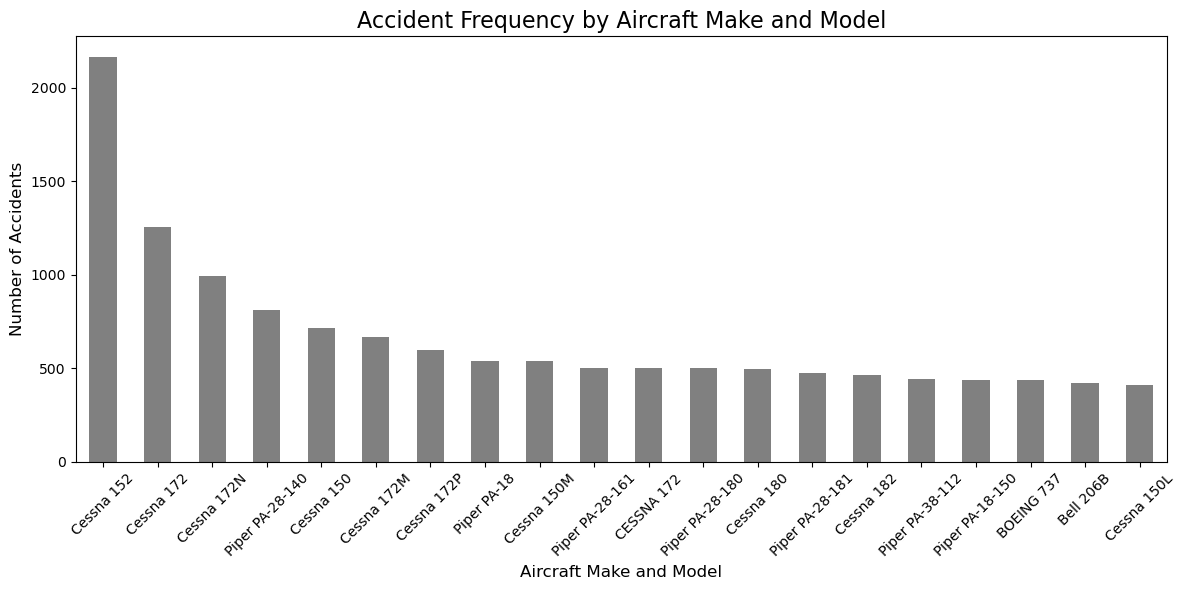

In [18]:
#Data visualisation for accident frequency by Aircraft make and model
df['Aircraft'] = df['Make'] + ' ' + df['Model']

# Count the frequency of accidents for each Aircraft Make and Model
accident_counts = df['Aircraft'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
accident_counts[:20].plot(kind='bar', color='grey')  # Plot the top 20 most frequent aircraft accidents

# Add labels and title
plt.title('Accident Frequency by Aircraft Make and Model', fontsize=16)
plt.xlabel('Aircraft Make and Model', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()





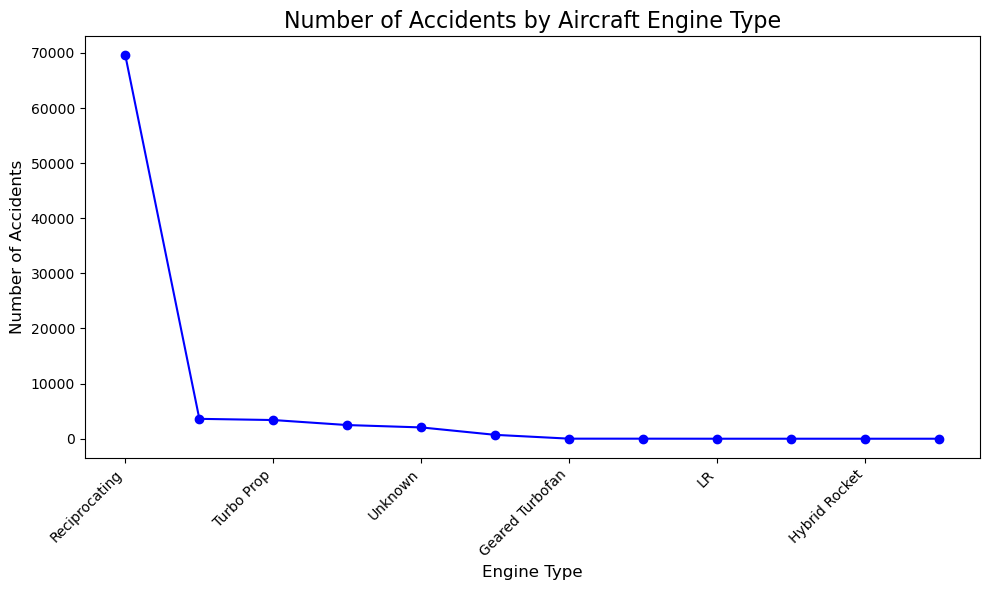

In [19]:
#Visualition of number of accident and aircraft engine type
# Count the number of accidents for each Engine Type
engine_accident_counts = df['Engine_Type'].value_counts()

# Plot the line graph
plt.figure(figsize=(10, 6))
engine_accident_counts.plot(kind='line', marker='o', color='blue')

# Add labels and title
plt.title('Number of Accidents by Aircraft Engine Type', fontsize=16)
plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

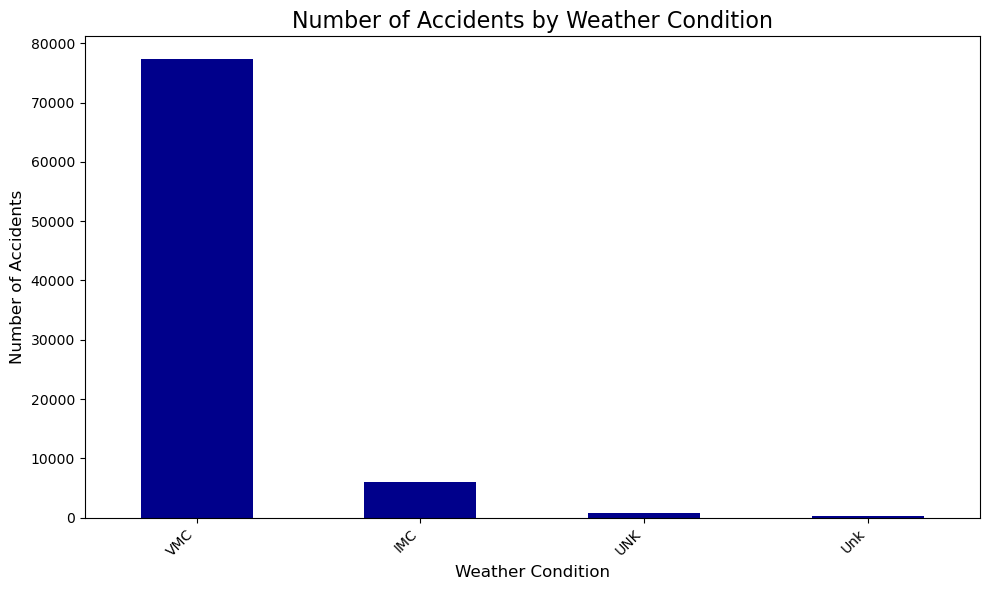

In [20]:
#Visualisation of Accidents by Weather Conditions
Weather_accident_counts = df['Weather_Condition'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
Weather_accident_counts.plot(kind='bar', color='darkblue')


# Add labels and title
plt.title('Number of Accidents by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


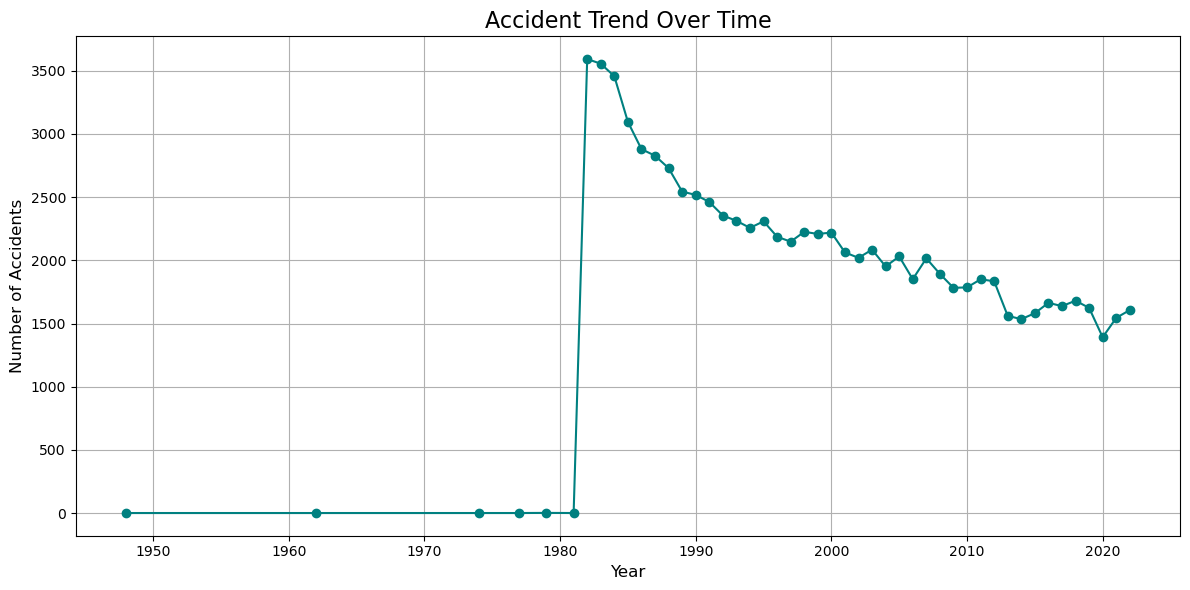

In [21]:
#Analyze how accident frequency has changed over the years by plotting event date(years and number of accidents
# Convert 'Event_Date' to datetime format (if not already done)
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['Event_Date'])

# Extract the year from 'Event_Date' and count accidents per year in one step
accidents_per_year = df['Event_Date'].dt.year.value_counts().sort_index()

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year.index, accidents_per_year.values, marker='o', color='teal')

# Add labels and title
plt.title('Accident Trend Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show grid for better readability
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

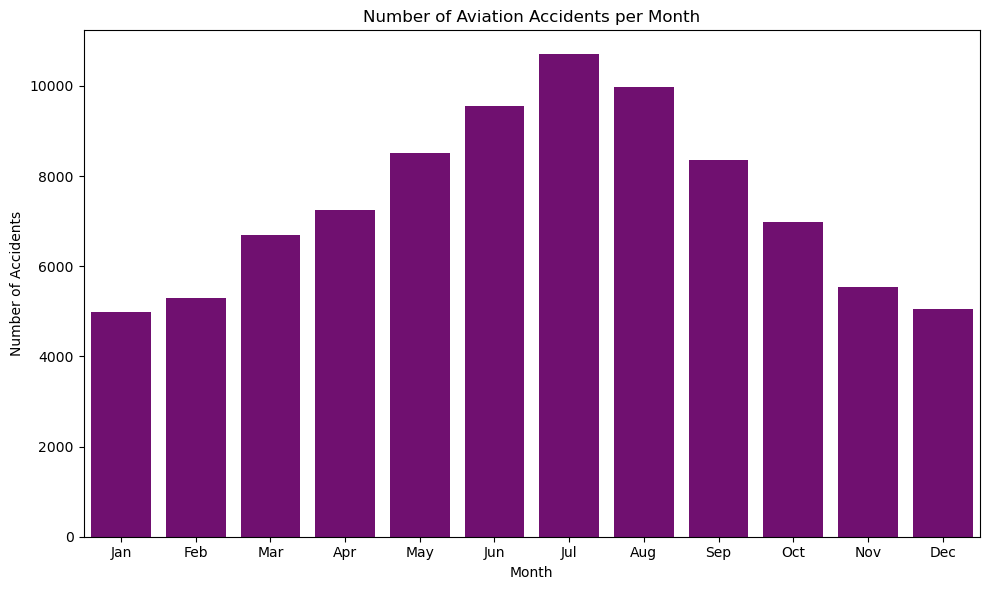

In [22]:
#Analyze how accident frequency has changed over the years by plotting event date(month) and number of accidents
df['Event_Date'] = pd.to_datetime(df['Event_Date'], errors='coerce')

# Drop rows with invalid dates (if any)
df = df.dropna(subset=['Event_Date'])

# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a new column for month abbreviations
df['Month.Abbr'] = df['Event_Date'].dt.strftime('%b')


# Create the count plot
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Month.Abbr', color='purple', order=month_order, data=df)
plot.set(xlabel='Month', ylabel= 'Number of Accidents', title='Number of Aviation Accidents per Month')


# Show the plot
plt.tight_layout()
plt.show()

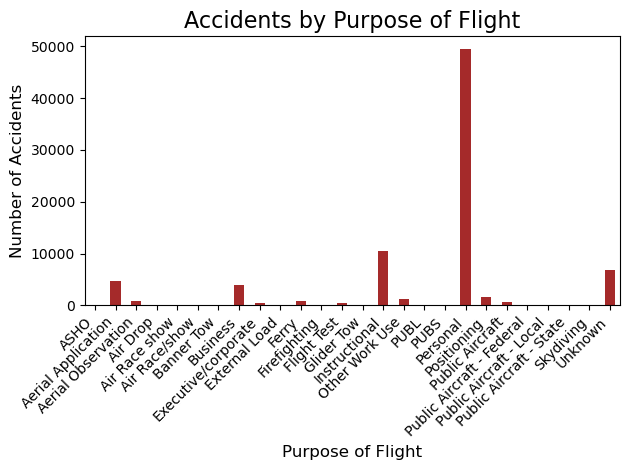

In [23]:
#Visualisation of accidents by purpose of fights
purpose_counts = df.groupby('Purpose_of_flight')['Event_Id'].count()
purpose_counts.plot(kind='bar', title='Accidents by Purpose of Flight',  color='brown')
# Add labels and title
plt.title('Accidents by Purpose of Flight', fontsize=16)
plt.xlabel('Purpose of Flight', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

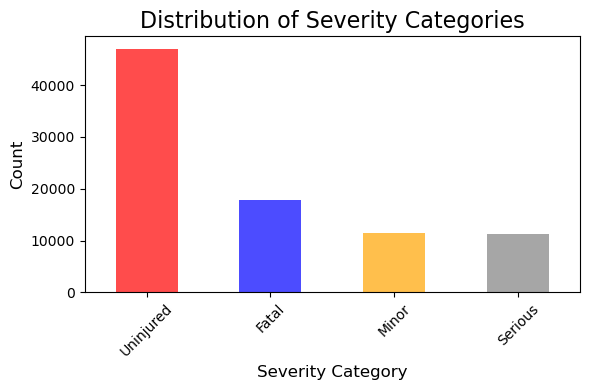

In [24]:
#Visualisation of the distribution of severity categories
def categorize_severity(row):
    if row['Total_Fatal_Injuries'] > 0:
        return 'Fatal'
    elif row['Total_Serious_Injuries'] > 0:
        return 'Serious'
    elif row['Total_Minor_Injuries'] > 0:
        return 'Minor'
    elif row['Total_Uninjured'] >0:
        return 'Uninjured'
    

# Apply the function to create the Severity_Category column
df['Severity_Category'] = df.apply(categorize_severity, axis=1)

# Count the occurrences of each severity category
severity_counts = df['Severity_Category'].value_counts()

# Plotting the distribution of severity categories
plt.figure(figsize=(6, 4))
severity_counts.plot(kind='bar', color=['red', 'blue', 'orange', 'gray'], alpha=0.7)  
plt.title('Distribution of Severity Categories', fontsize=16)
plt.xlabel('Severity Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

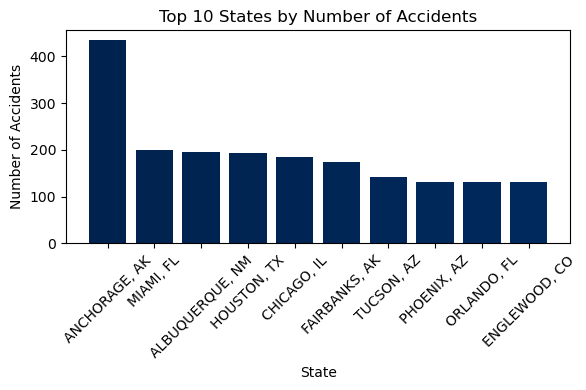

In [25]:
#Visualisation of top ten states with most accidents
# Get the top 10 states by accident count
top_10_states = df['Location'].value_counts().head(10)

# Create a colormap based on the number of states
cmap = mpl.colormaps['cividis']  # Use the new method to access the colormap
colors = cmap(range(len(top_10_states)))

# Plotting the data
plt.figure(figsize=(6, 4))
plt.bar(top_10_states.index, top_10_states.values, color=colors)
plt.title('Top 10 States by Number of Accidents')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Conclusion
1. Aircraft Make and Model Risk:
Several aircraft makes and models show significantly higher accident rates. Models from manufacturers such as Cessna and Piper Pa have been involved in a disproportionate number of accidents and should be avoided.
2. Weather and Operational Conditions:
A significant number of accidents occurred under poor weather conditions(VMC). Aircraft that perform well under adverse weather, particularly those involved in fewer weather-related incidents, are recommended for areas where adverse weather is common.

Creating a CSV File for the cleaned data 

In [27]:
df.to_csv('cleaned_data.csv', index=False)


In [28]:
df_cleaned=pd.read_csv('cleaned_data.csv')
df_cleaned

C:\Users\HP\AppData\Local\Temp\ipykernel_12272\3686525095.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned=pd.read_csv('cleaned_data.csv')


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Injury_Severity,Aircraft_damage,Registration_Number,Make,...,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Aircraft,Month.Abbr,Severity_Category
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,Stinson 108-3,Oct,Fatal
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,1996-09-19,Piper PA24-180,Jul,Fatal
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,NaN,NaN,NaN,IMC,Cruise,Probable Cause,2007-02-26,Cessna 172M,Aug,Fatal
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,2000-09-12,Rockwell 112,Jun,Fatal
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,N15NY,Cessna,...,2.0,NaN,0.0,VMC,Approach,Probable Cause,1980-04-16,Cessna 501,Aug,Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,Minor,NaN,N1867H,PIPER,...,1.0,0.0,0.0,NaN,NaN,NaN,2022-12-29,PIPER PA-28-151,Dec,Serious
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,N2895Z,BELLANCA,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,BELLANCA 7ECA,Dec,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,N749PJ,AMERICAN CHAMPION AIRCRAFT,...,0.0,0.0,1.0,VMC,NaN,NaN,2022-12-27,AMERICAN CHAMPION AIRCRAFT 8GCBC,Dec,Uninjured
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,N210CU,CESSNA,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,CESSNA 210N,Dec,NaN
